In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d shreyaspj/android-devices-and-mobiles

Dataset URL: https://www.kaggle.com/datasets/shreyaspj/android-devices-and-mobiles
License(s): unknown
android-devices-and-mobiles.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip -o android-devices-and-mobiles.zip

Archive:  android-devices-and-mobiles.zip
  inflating: mobiles1.csv            


In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings as ws
import numpy as np
import re
ws.filterwarnings("ignore")

In [5]:
data=pd.read_csv("mobiles1.csv")

In [6]:
data.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


Handling Null Value

In [7]:
data.isnull().sum()

battery        0
camera         0
display        0
memory         0
name           0
price          0
processor      1
rating        13
reviews       13
warranty     148
dtype: int64

In [8]:
print(data['processor'].value_counts())

processor
Qualcomm Snapdragon 730G Processor                                                                                                                 21
1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase    20
Qualcomm Snapdragon 439 Processor                                                                                                                  18
MediaTek Helio G90T Processor                                                                                                                      18
Qualcomm Snapdragon 665 Processor                                                                                                                  18
                                                                                                                                                   ..
MTK MT6739 Processor                                                                      

In [9]:
print(data['rating'].value_counts())

rating
4.4    244
4.5    187
4.3    162
4.2     81
4.1     81
4.0     36
3.9     34
3.8     31
4.6     26
3.6     24
3.7     21
3.5     15
3.2      7
3.4      6
4.7      4
3.3      3
4.8      2
3.1      2
4.9      1
2.8      1
2.7      1
2.9      1
3.0      1
Name: count, dtype: int64


In [10]:
print(data['reviews'].value_counts())

reviews
1 Reviews         10
3 Reviews         10
31 Reviews         9
8 Reviews          9
10,091 Reviews     8
                  ..
599 Reviews        1
51 Reviews         1
900 Reviews        1
391 Reviews        1
81 Reviews         1
Name: count, Length: 386, dtype: int64


In [11]:
print(data['warranty'].value_counts())

warranty
Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories                                                                         323
1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase     37
Brand Warranty of 1 Year Available for Mobile and 6 Months for Battery and Accessories                                                              33
Brand Warranty of 1 Year                                                                                                                            28
1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories                                                             23
                                                                                                                                                  ... 
1 Year for Handset                                                                   

In [12]:
data['processor'].fillna('Qualcomm Snapdragon 730G Processor',inplace=True)
data['rating'].fillna(4.4,inplace=True)
data['reviews'].fillna('1 Reviews',inplace=True)
data['warranty'].fillna('Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories',inplace=True)

In [13]:
data.isnull().sum()

battery      0
camera       0
display      0
memory       0
name         0
price        0
processor    0
rating       0
reviews      0
warranty     0
dtype: int64

Cleaning Data

In [14]:
data['battery']=[a.split()[0] for a in data['battery']]

In [15]:
data

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot
...,...,...,...,...,...,...,...,...,...,...
979,2000,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) FWVGA Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,Brand Warranty of 1 Year Available for Mobile ...
980,2680,13MP Rear Camera | 5MP Front Camera,13.21 cm (5.2 inch) Full HD Display,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year
981,4550,13MP + 5MP | 20MP Front Camera,15.24 cm (6 inch) Full HD Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...
982,2100,8MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty


In [16]:
data['rear_camera']=[a.split('|')[0].replace('Rear Camera','').replace('MP','') for a in data['camera']]
data['front_camera']=[a.split('|')[-1].replace('Front Camera','').replace('MP','') for a in data['camera']]
data.drop(columns=['camera'],inplace=True)

In [17]:
def sum_numbers(string):
    numbers = re.findall(r'\d+', string)
    return sum(map(int, numbers))

In [18]:
data['rear_camera'] = data['rear_camera'].apply(sum_numbers)
data['front_camera'] = data['front_camera'].apply(sum_numbers)

In [19]:
data

,battery,display,memory,name,price,processor,rating,reviews,warranty,rear_camera,front_camera
0,5000,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...,14,8
1,5000,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design,24,8
2,5000,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,24,8
3,5000,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,24,8
4,4000,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot,15,5
...,...,...,...,...,...,...,...,...,...,...,...
979,2000,12.7 cm (5 inch) FWVGA Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,Brand Warranty of 1 Year Available for Mobile ...,5,2
980,2680,13.21 cm (5.2 inch) Full HD Display,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year,13,5
981,4550,15.24 cm (6 inch) Full HD Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...,18,20
982,2100,12.7 cm (5 inch) HD Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty,8,2


In [20]:
data['display_size']=[a.split()[0] for a in data['display']]
data.drop(columns=['display'],inplace=True)

In [21]:
data

,battery,memory,name,price,processor,rating,reviews,warranty,rear_camera,front_camera,display_size
0,5000,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...,14,8,15.8
1,5000,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
2,5000,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
3,5000,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
4,4000,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot,15,5,15.49
...,...,...,...,...,...,...,...,...,...,...,...
979,2000,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,Brand Warranty of 1 Year Available for Mobile ...,5,2,12.7
980,2680,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year,13,5,13.21
981,4550,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...,18,20,15.24
982,2100,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty,8,2,12.7


In [22]:
data['name']=[a.split()[0] for a in data['name']]

In [23]:
data

,battery,memory,name,price,processor,rating,reviews,warranty,rear_camera,front_camera,display_size
0,5000,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...,14,8,15.8
1,5000,4 GB RAM | 64 GB ROM,Realme,10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
2,5000,4 GB RAM | 128 GB ROM,Realme,11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
3,5000,4 GB RAM | 128 GB ROM,Realme,11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
4,4000,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,Realme,7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot,15,5,15.49
...,...,...,...,...,...,...,...,...,...,...,...
979,2000,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,Micromax,3590,12 Months Brand Warranty,3.8,105 Reviews,Brand Warranty of 1 Year Available for Mobile ...,5,2,12.7
980,2680,3 GB RAM | 32 GB ROM,Nextbit,19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,Brand Warranty of 1 Year,13,5,13.21
981,4550,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Gionee,10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...,18,20,15.24
982,2100,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,XOLO,8990,MTK 6592M Processor,3.8,81 Reviews,1 Year Manufacturer Warranty,8,2,12.7


In [24]:
data['processor']=[a.split()[0] for a in data['processor']]

In [25]:
data

,battery,memory,name,price,processor,rating,reviews,warranty,rear_camera,front_camera,display_size
0,5000,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,9999,Qualcomm,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...,14,8,15.8
1,5000,4 GB RAM | 64 GB ROM,Realme,10999,Qualcomm,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
2,5000,4 GB RAM | 128 GB ROM,Realme,11999,Qualcomm,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
3,5000,4 GB RAM | 128 GB ROM,Realme,11999,Qualcomm,4.5,"20,062 Reviews",Sunrise Design,24,8,16.56
4,4000,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,Realme,7499,MediaTek,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot,15,5,15.49
...,...,...,...,...,...,...,...,...,...,...,...
979,2000,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,Micromax,3590,12,3.8,105 Reviews,Brand Warranty of 1 Year Available for Mobile ...,5,2,12.7
980,2680,3 GB RAM | 32 GB ROM,Nextbit,19999,Qualcomm,4.0,516 Reviews,Brand Warranty of 1 Year,13,5,13.21
981,4550,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Gionee,10499,Helio,4.1,710 Reviews,Brand Warranty of 1 Year Available for Mobile ...,18,20,15.24
982,2100,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,XOLO,8990,MTK,3.8,81 Reviews,1 Year Manufacturer Warranty,8,2,12.7


In [26]:
data['reviews']=[a.split()[0].replace(',','') for a in data['reviews']]

In [27]:
data

,battery,memory,name,price,processor,rating,reviews,warranty,rear_camera,front_camera,display_size
0,5000,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,Redmi,9999,Qualcomm,4.4,55078,Brand Warranty of 1 Year Available for Mobile ...,14,8,15.8
1,5000,4 GB RAM | 64 GB ROM,Realme,10999,Qualcomm,4.5,20062,Sunrise Design,24,8,16.56
2,5000,4 GB RAM | 128 GB ROM,Realme,11999,Qualcomm,4.5,20062,Sunrise Design,24,8,16.56
3,5000,4 GB RAM | 128 GB ROM,Realme,11999,Qualcomm,4.5,20062,Sunrise Design,24,8,16.56
4,4000,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,Realme,7499,MediaTek,4.4,10091,Dual Nano SIM slots and Memory Card Slot,15,5,15.49
...,...,...,...,...,...,...,...,...,...,...,...
979,2000,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,Micromax,3590,12,3.8,105,Brand Warranty of 1 Year Available for Mobile ...,5,2,12.7
980,2680,3 GB RAM | 32 GB ROM,Nextbit,19999,Qualcomm,4.0,516,Brand Warranty of 1 Year,13,5,13.21
981,4550,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,Gionee,10499,Helio,4.1,710,Brand Warranty of 1 Year Available for Mobile ...,18,20,15.24
982,2100,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,XOLO,8990,MTK,3.8,81,1 Year Manufacturer Warranty,8,2,12.7


In [28]:
data['RAM_in_GB']=[a.split('|')[0].replace('GB RAM','').replace('2 MB RAM','0.002').replace('4 MB RAM','0.004').replace('8 MB RAM','0.008').replace('16 MB RAM','0.016').replace('32 MB RAM','0.032').replace('64 MB RAM','0.064').replace('128 MB RAM','0.128').replace('256 MB RAM','0.256').replace('512 MB RAM','0.512') for a in data['memory']]
data['ROM_in_GB']=[a.split('|')[1].replace('GB ROM','').replace('2 MB ROM','0.002').replace('4 MB ROM','0.004').replace('8 MB ROM','0.008').replace('16 MB ROM','0.016').replace('32 MB ROM','0.032').replace('64 MB ROM','0.064').replace('128 MB ROM','0.128').replace('256 MB ROM','0.256').replace('512 MB ROM','0.512') for a in data['memory']]

In [29]:
data['RAM_in_GB']=data['RAM_in_GB'].astype(float)
data['ROM_in_GB']=data['ROM_in_GB'].astype(float)

In [30]:
data.drop(columns=['memory'],inplace=True)

In [31]:
data

,battery,name,price,processor,rating,reviews,warranty,rear_camera,front_camera,display_size,RAM_in_GB,ROM_in_GB
0,5000,Redmi,9999,Qualcomm,4.4,55078,Brand Warranty of 1 Year Available for Mobile ...,14,8,15.8,4.0,64.0
1,5000,Realme,10999,Qualcomm,4.5,20062,Sunrise Design,24,8,16.56,4.0,64.0
2,5000,Realme,11999,Qualcomm,4.5,20062,Sunrise Design,24,8,16.56,4.0,128.0
3,5000,Realme,11999,Qualcomm,4.5,20062,Sunrise Design,24,8,16.56,4.0,128.0
4,4000,Realme,7499,MediaTek,4.4,10091,Dual Nano SIM slots and Memory Card Slot,15,5,15.49,3.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,2000,Micromax,3590,12,3.8,105,Brand Warranty of 1 Year Available for Mobile ...,5,2,12.7,1.0,8.0
980,2680,Nextbit,19999,Qualcomm,4.0,516,Brand Warranty of 1 Year,13,5,13.21,3.0,32.0
981,4550,Gionee,10499,Helio,4.1,710,Brand Warranty of 1 Year Available for Mobile ...,18,20,15.24,4.0,64.0
982,2100,XOLO,8990,MTK,3.8,81,1 Year Manufacturer Warranty,8,2,12.7,1.0,8.0


In [32]:
data.dtypes

battery          object
name             object
price             int64
processor        object
rating          float64
reviews          object
warranty         object
rear_camera       int64
front_camera      int64
display_size     object
RAM_in_GB       float64
ROM_in_GB       float64
dtype: object

In [33]:
data['battery']=data['battery'].astype(int)
data['name']=data['name'].astype(str)
data['processor']=data['processor'].astype(str)
data['reviews']=data['reviews'].astype(int)
data['display_size']=data['display_size'].astype(float)
data.drop(columns=['warranty'],inplace=True)

In [34]:
data

,battery,name,price,processor,rating,reviews,rear_camera,front_camera,display_size,RAM_in_GB,ROM_in_GB
0,5000,Redmi,9999,Qualcomm,4.4,55078,14,8,15.80,4.0,64.0
1,5000,Realme,10999,Qualcomm,4.5,20062,24,8,16.56,4.0,64.0
2,5000,Realme,11999,Qualcomm,4.5,20062,24,8,16.56,4.0,128.0
3,5000,Realme,11999,Qualcomm,4.5,20062,24,8,16.56,4.0,128.0
4,4000,Realme,7499,MediaTek,4.4,10091,15,5,15.49,3.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...
979,2000,Micromax,3590,12,3.8,105,5,2,12.70,1.0,8.0
980,2680,Nextbit,19999,Qualcomm,4.0,516,13,5,13.21,3.0,32.0
981,4550,Gionee,10499,Helio,4.1,710,18,20,15.24,4.0,64.0
982,2100,XOLO,8990,MTK,3.8,81,8,2,12.70,1.0,8.0


<Axes: ylabel='name'>

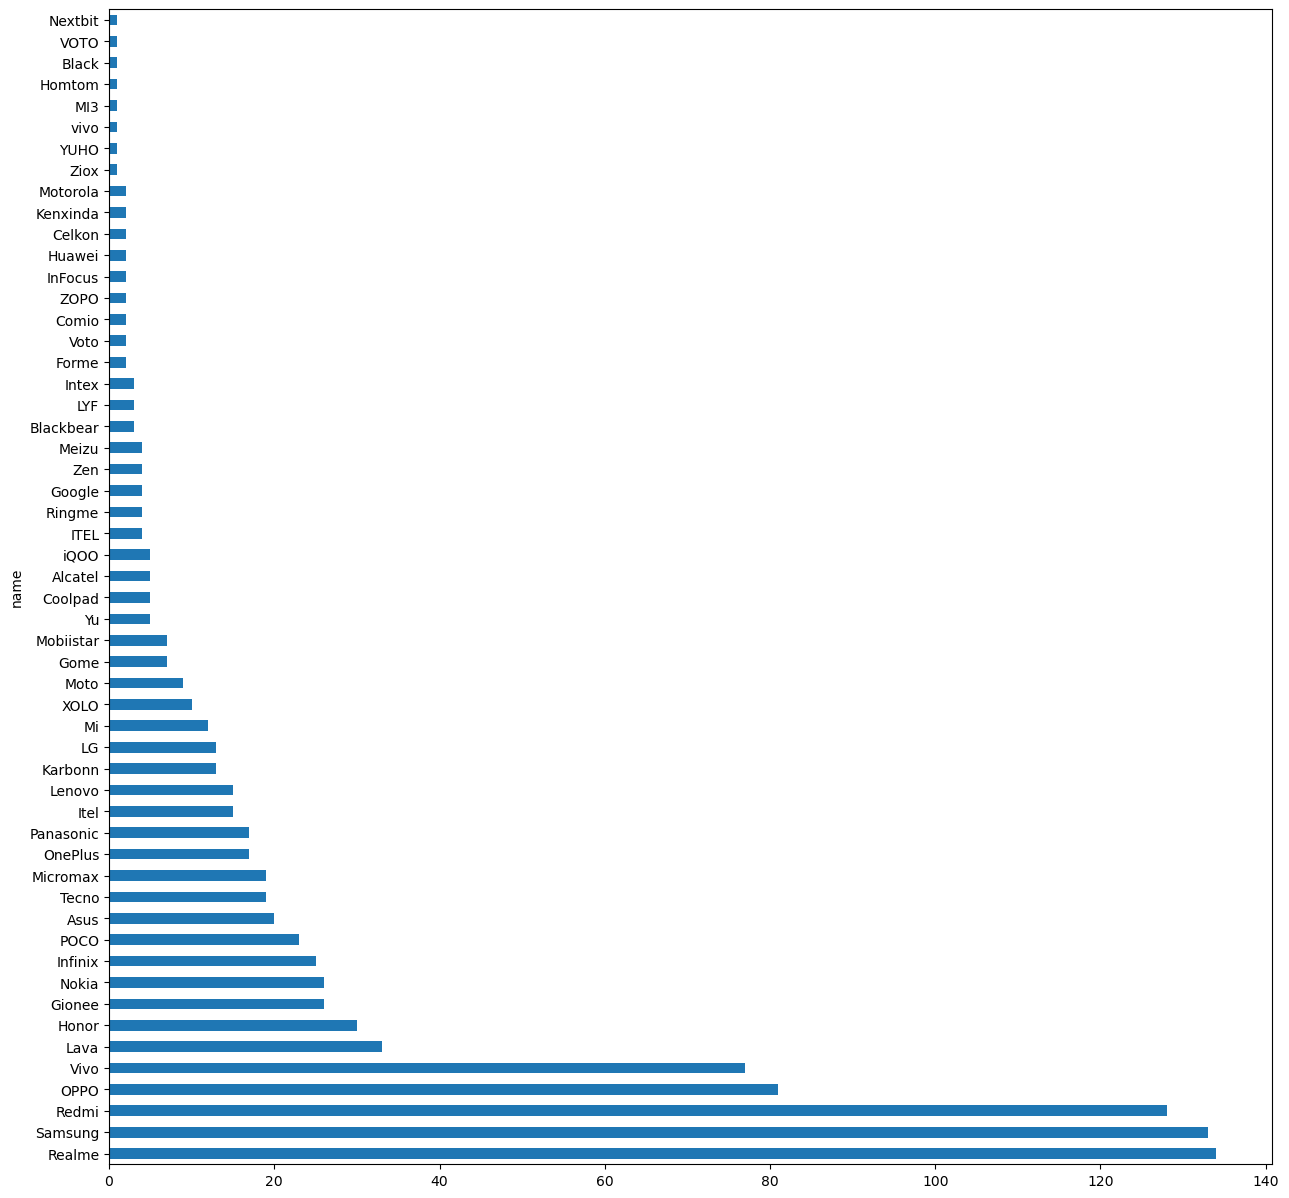

In [35]:
data['name'].value_counts().plot(kind='barh',figsize=(15,15))

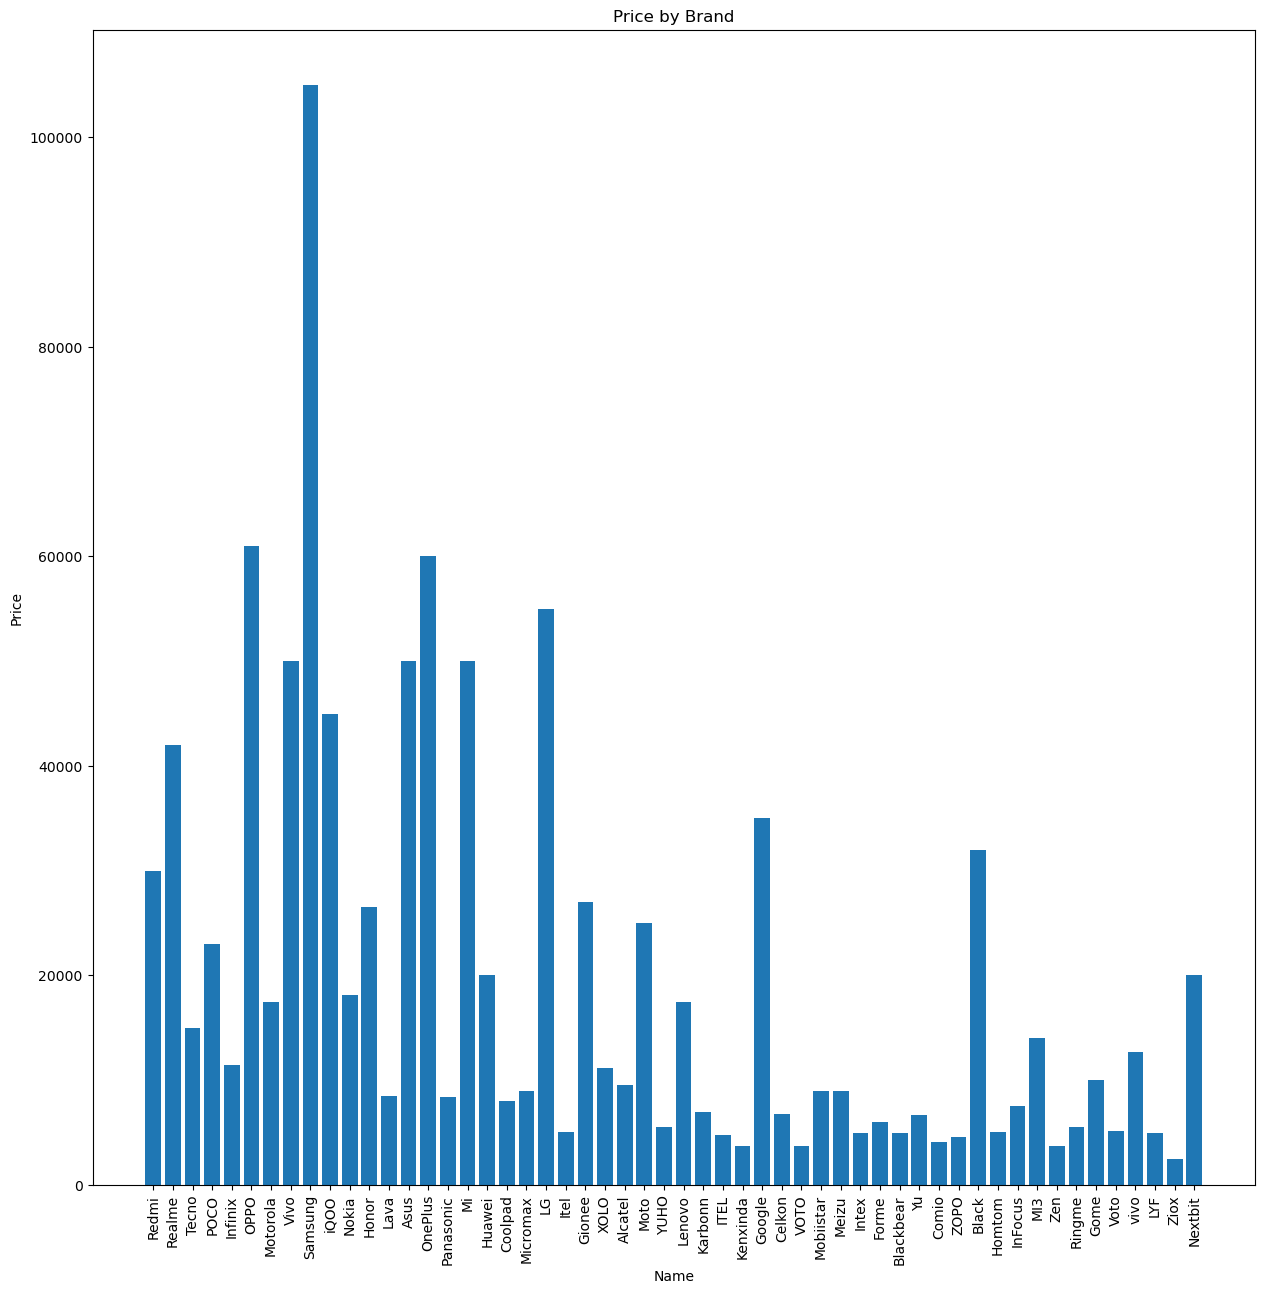

In [47]:
plt.figure(figsize=(15, 15))
plt.bar(data['name'], data['price'])
plt.xlabel('Name')
plt.ylabel('Price')
plt.title('Price by Brand')
plt.xticks(rotation=90)
plt.show()